In [1]:
%pip --quiet install qiskit pylatexenc git+https://github.com/qiskit-community/qiskit-textbook.git#subdirectory=qiskit-textbook-src
%matplotlib inline

# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.quantum_info import Operator
from qiskit.tools.jupyter import *
from qiskit.visualization import *

# Loading your IBM Q account(s)
# IBMQ.load_account()
backend = Aer.get_backend('qasm_simulator')

Note: you may need to restart the kernel to use updated packages.


In [2]:
def initialize_s(qc, qubits):
    """Apply a H-gate to 'qubits' in qc"""
    for q in qubits:
        qc.h(q)
    return qc

In [3]:
n = 2
grover_circuit = QuantumCircuit(n)

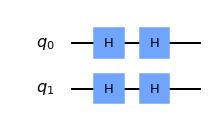

In [5]:
grover_circuit = initialize_s(grover_circuit, [0,1])
grover_circuit.draw('mpl')

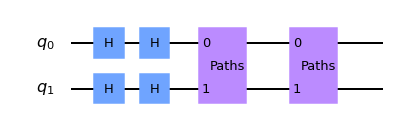

In [7]:
oracle = Operator([[1, 0, 0, 0],
          [0, -1, 0, 0],
          [0, 0, 1, 0],
          [0, 0, 0, 1]])
grover_circuit.unitary(oracle, [0, 1], label='Paths')
grover_circuit.draw('mpl')

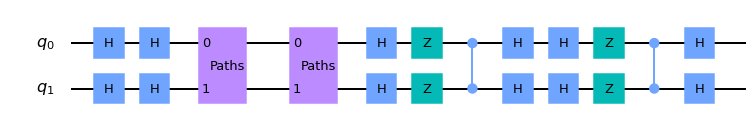

In [9]:
# Diffusion operator (U_s)
grover_circuit.h([0,1])
grover_circuit.z([0,1])
grover_circuit.cz(0,1)
grover_circuit.h([0,1])
grover_circuit.draw('mpl')

In [10]:
sv_sim = Aer.get_backend('statevector_simulator')
job_sim = execute(grover_circuit, sv_sim)
statevec = job_sim.result().get_statevector()

from qiskit_textbook.tools import vector2latex
vector2latex(statevec, pretext="|\\psi\\rangle =")

ModuleNotFoundError: No module named 'qiskit_textbook'

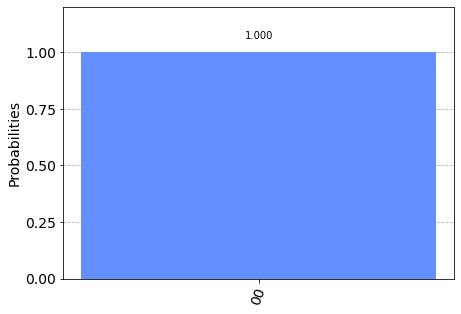

In [11]:
grover_circuit.measure_all()

results = execute(grover_circuit, backend=backend).result()
answer = results.get_counts()
plot_histogram(answer)